# **Capstone Project - Bellabeat Case Study**
Uncovering insight of fitness device usage to guide Bellabeat app marketing strategy.

# Overview
Bellabeat, founded by Urška Sršen and Sando Murf, is a tech-driven wellness company for women. Bellabeat's beautifully designed technology empowers women with knowledge about their own health and habbits. Their product includes wellness tracker *Leaf* and *Time*  that tracks wearer's activity, sleep and stress and *Spring* that tracks daily water intake. All the data collected from the wellness trackers syncs into the *Bellabeat app* which provides users with health data to help them better understand their current habits and helps users make a heathier decisions. The *Bellabeat App*  provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

# Objective
The company believes that with its unique products, they have the potential to become larger players in the global smart device market. The marketing analytics team have be tasked with a project to uncover new growth opportunities through better understanding of consumer's usage of smart devices through analyzing smart device fitness datas. The insight of consumer's usage of smart devices will help guide the marketing strategy for the **BellaBeat app**.

* What are the fitness data saying about user's usage pattern?
* How can the usage data be useful to help shape marketing strategy for the Bellabeat app?
* Limitations and further research and analysis?

# Data

## Dataset
The main dataset that will be used for analysis is the Fitbit Fitness Tracker data. The data will be used to uncover insight of smart device user usage and fitness habits. Then the WHO Guideline on physical activity abd sedebtary behaviour will be used as a base to compare user's fitness habits to the WHO's recommended physical activity amount. 
* *Fitbit Fitness Tracker Data(CC0:Public Domain, dataset makde available through [Mobius](http://https://www.kaggle.com/arashnic/fitbit))*

This data set contains personal information tracker from thirty fitbit users from 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minuties-level output for physical activity, heart rate and sleep monitoring. It includes information about daily activity, steps and heart rate that can be used to explore user's habits. 
* *[WHO guidelines on physical activity and sedentary behaviour ](http://www.who.int/publications/i/item/9789240015128)*

The WHO Guidelines on physical activity and sedentary behaviour provide evidence-based public health recommendations for children, adolescents, adults and older adults on the amount of physical activity (frequency, intensity and duration) required to offer significant health benefits and mitigate health risks. 
## Data Preparation and Processing

Loading the packages that will be used to process, clean and analyse the data

In [1]:
library(skimr)
library(tidyr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(janitor)
library(lubridate)
library(timetk)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.5     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




importing csv. files

In [2]:
dailyactivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourlyintensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlysteps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
heartrate_seconds <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
minuteMETs <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 22099 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 22099 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `sh

Checking the structures and column names of each dataframe

In [3]:
glimpse(dailyactivity)
glimpse(hourlyintensities)
glimpse(hourlysteps)
glimpse(minuteMETs)
glimpse(heartrate_seconds)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Checking for errors and irregular values

In [4]:
skim_without_charts(dailyactivity)
skim_without_charts(hourlyintensities)
skim_without_charts(hourlysteps)
skim_without_charts(minuteMETs)
skim_without_charts(heartrate_seconds)

── Data Summary ────────────────────────
                           Values       
Name                       dailyactivity
Number of rows             940          
Number of columns          15           
_______________________                 
Column type frequency:                  
  character                1            
  numeric                  14           
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3    

Checking for unique Ids in each dataframe. Noting that heartrate_seconds dataframe only contains 14 unique Ids.

In [5]:
n_distinct(dailyactivity$Id)
n_distinct(hourlyintensities$Id)
n_distinct(hourlysteps$Id)
n_distinct(heartrate_seconds$Id)
n_distinct(minuteMETs$Id)

[1] 33

[1] 33

[1] 33

[1] 14

[1] 33

METs dataframe fix METs irregular output

In [6]:
#checking min and max of METs column
summary(minuteMETs$METs)
#MET original MET API doesn't come with decimal so dividing with 10
minuteMETs$METspoint <- minuteMETs$METs / 10
summary(minuteMETs$METspoint)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   10.00   14.69   11.00  157.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.469   1.100  15.700 

Renaming columns

In [7]:
hourlyintensities <- rename(hourlyintensities,Time=ActivityHour)
hourlysteps <- rename(hourlysteps,Time=ActivityHour)

Converting from characters into dttm format for all the timeframe columns

In [8]:
heartrate_seconds$Time=as.POSIXct(heartrate_seconds$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourlysteps$Time=as.POSIXct(hourlysteps$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourlyintensities$Time=as.POSIXct(hourlyintensities$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
dailyactivity$ActivityDate=as.POSIXct(dailyactivity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
glimpse(hourlysteps)
glimpse(hourlyintensities)
glimpse(dailyactivity)
glimpse(heartrate_seconds)

Rows: 22,099
Columns: 3
$ Id        <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, …
$ Time      <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12 02:00:…
$ StepTotal <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 221,…
Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ Time             <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12…
$ TotalIntensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74,

Converting heart rate per seconds into hourly

In [9]:
heartrate_hourly <- heartrate_seconds %>% 
  group_by(Id) %>% 
  summarise_by_time(
    .date_var = Time,
    .by = "hour",
    avg_heartrate = mean(Value) 
  )
#separating time and date 
heartrate_hourly<- heartrate_hourly %>%
  separate(Time, c("date", "time"), " ")
glimpse(heartrate_hourly)

Rows: 6,013
Columns: 4
Groups: Id [14]
$ Id            <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 20224844…
$ date          <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12", …
$ time          <chr> "07:00:00", "08:00:00", "09:00:00", "10:00:00", "11:00:0…
$ avg_heartrate <dbl> 83.20000, 68.56201, 66.40470, 106.71608, 67.76716, 66.23…


Merging all hourly data into one dataframe and cleaning up the data

In [10]:
hourlyactivity <- merge(hourlyintensities,hourlysteps,by=c("Id","Time"))
#separate date and time in hourlyactivity 
hourlyactivity<- hourlyactivity %>%
  separate(Time, c("date", "time"), " ")
#rounding decimal point to 2
hourlyactivity$AverageIntensity <- round(hourlyactivity$AverageIntensity, 2)
glimpse(hourlyactivity)

Rows: 22,099
Columns: 6
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ date             <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12…
$ time             <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:0…
$ TotalIntensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.33, 0.13, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.22,…
$ StepTotal        <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 25…


Adding more context to the dataframe: Adding days of the week and week

In [11]:
#Adding week break using cut.Date function
dailyactivity$ActivityDate <- as.Date(dailyactivity$ActivityDate)
dailyactivity <- dailyactivity %>% 
mutate(week = cut.Date(ActivityDate, breaks = "1 week", labels = FALSE)) %>% 
  arrange(ActivityDate)
#Adding weekday using weekdays function
dailyactivity$weekday = weekdays(dailyactivity$ActivityDate)
#Moving the column to the front
dailyactivity <- dailyactivity %>% relocate(weekday, .after= ActivityDate)
dailyactivity <- dailyactivity %>% relocate(week,.after = weekday)
glimpse(dailyactivity)

Rows: 940
Columns: 17
$ Id                       <dbl> 1503960366, 1624580081, 1644430081, 184450507…
$ ActivityDate             <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ weekday                  <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "…
$ week                     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalSteps               <dbl> 13162, 8163, 10694, 6697, 678, 11875, 4414, 1…
$ TotalDistance            <dbl> 8.50, 5.31, 7.77, 4.43, 0.47, 8.34, 2.74, 7.4…
$ TrackerDistance          <dbl> 8.50, 5.31, 7.77, 4.43, 0.47, 8.34, 2.74, 7.4…
$ LoggedActivitiesDistance <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 0.000…
$ VeryActiveDistance       <dbl> 1.88, 0.00, 0.14, 0.00, 0.00, 3.31, 0.19, 1.1…
$ ModeratelyActiveDistance <dbl> 0.55, 0.00, 2.30, 0.00, 0.00, 0.77, 0.35, 0.3…
$ LightActiveDistance      <dbl> 6.06, 5.31, 5.33, 4.43, 0.47, 4.26, 2.20, 6.0…
$ SedentaryActiveDistance  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ VeryActiveMinute

# Analysis

Plotting average daily steps per hour to find out the most active time of the day

Based on the graph, the most active time of the day is morning time between 7 AM until 11 AM, and in the evening between 4 PM to 6 PM. 

Keeping in mind that there are only 14 unique Id in the heart rate dataframe. Therefor, the data will not be an accurate representation of all the participants. 

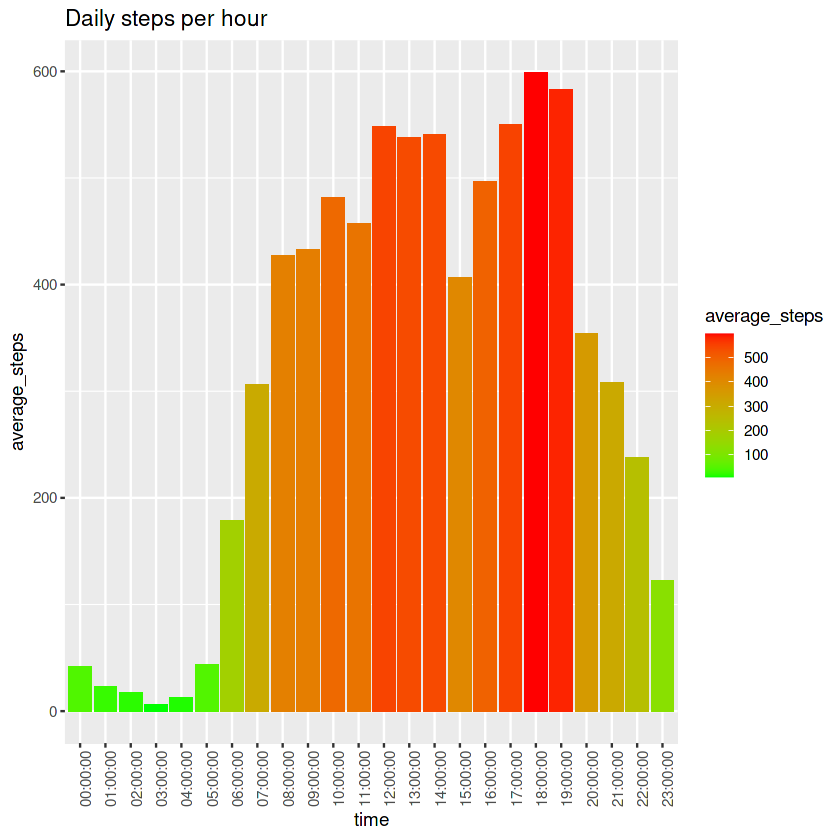

In [12]:
#Daily Steps per hour
hourlyactivity %>% 
group_by(time) %>% 
summarise(average_steps = mean(StepTotal)) %>% 
ggplot()+
geom_col(mapping = aes(x = time, y = average_steps, fill = average_steps))+
labs(title = "Daily steps per hour")+
scale_fill_gradient(low = "green", high = "red")+
theme(axis.text.x = element_text(angle = 90))

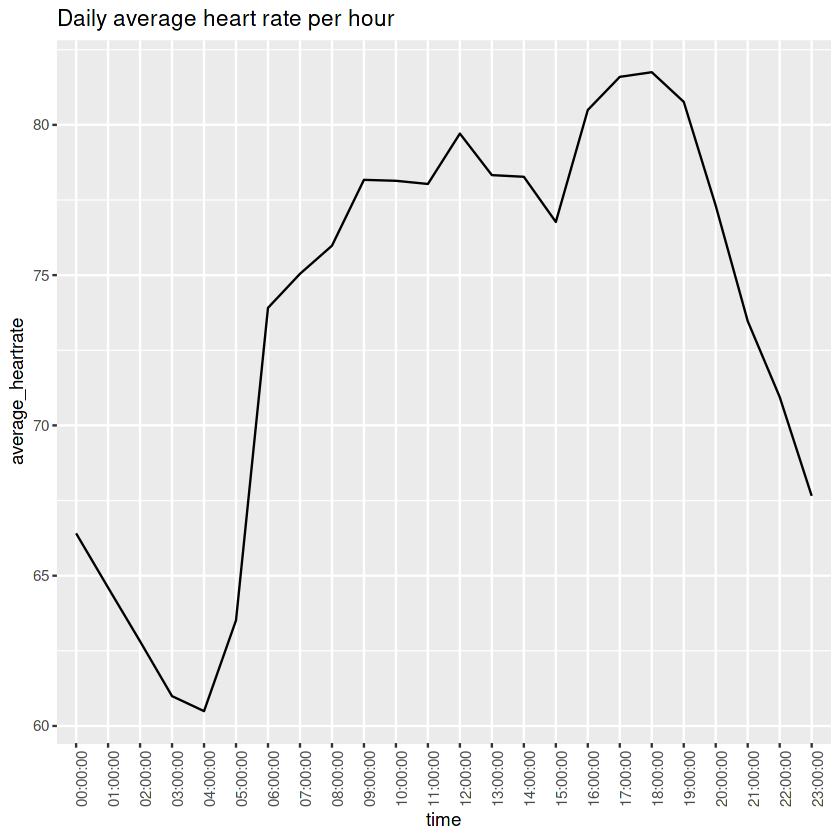

In [13]:
#Daily Heart rate per hour
heartrate_hourly %>% 
  group_by(time) %>% 
  summarise(average_heartrate = mean(avg_heartrate)) %>% 
  ggplot()+
  geom_line(mapping = aes(x = time, y = average_heartrate, group = 1))+
  labs(title = "Daily average heart rate per hour")+
  theme(axis.text.x = element_text(angle = 90))

Creating long form dataframe for activity in order to plot graphs of activite minutes where active intensity can be stacked.



In [14]:
#creating long dataframe using gather()
long_dailyintensity <- dailyactivity %>% 
  select(ActivityDate,VeryActiveMinutes:SedentaryMinutes) %>% 
  gather(activitytype,minutes,-ActivityDate)
#add weekdays to long_dailyintensity
long_dailyintensity$weekday = weekdays(long_dailyintensity$ActivityDate)
long_dailyintensity <- long_dailyintensity %>% relocate(weekday, .after= ActivityDate)
long_dailyintensity$weekday <- factor(long_dailyintensity$weekday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#add week to long_dailyintensity2
long_dailyintensity <- long_dailyintensity %>% 
  mutate(week = cut.Date(ActivityDate, breaks = "1 week", labels = FALSE)) %>% 
  arrange(ActivityDate)
long_dailyintensity <- long_dailyintensity %>% relocate(week,.after = weekday)
glimpse(long_dailyintensity)

Rows: 3,760
Columns: 5
$ ActivityDate <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ weekday      <fct> Tuesday, Tuesday, Tuesday, Tuesday, Tuesday, Tuesday, Tue…
$ week         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ activitytype <chr> "VeryActiveMinutes", "VeryActiveMinutes", "VeryActiveMinu…
$ minutes      <dbl> 25, 0, 2, 0, 0, 42, 3, 13, 28, 2, 0, 44, 4, 0, 0, 0, 0, 0…


<imc src="https://public.tableau.com/views/BellaBeatCapstone/Dashboard3?:language=en-GB&:display_count=n&:origin=viz_share_link">

FitBit stated that its Activity types correlates to the following [Acitivities table](https://en.wikipedia.org/wiki/Metabolic_equivalent_of_task#Activities). Therefore, *Lightly Active Minutes* will be considered as non-active minutes along with *Sedentary Active Minutes*. 

`summarise()` has grouped output by 'weekday'. You can override using the `.groups` argument.



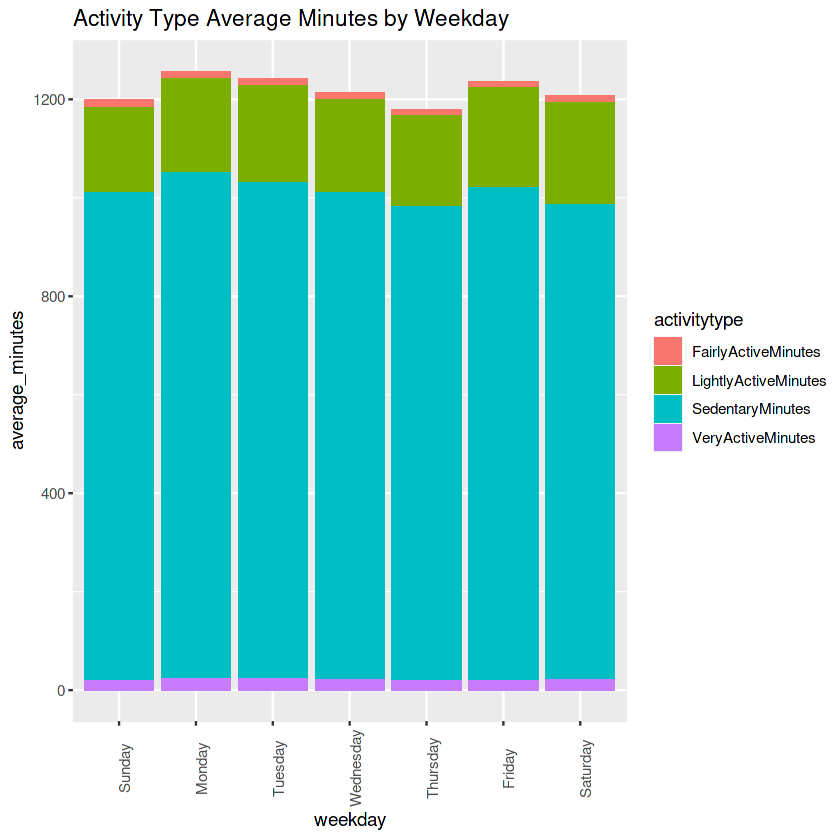

In [15]:
#Activity type by weekday
long_dailyintensity %>% 
  group_by(weekday, activitytype) %>% 
  summarise(average_minutes = mean(minutes)) %>% 
  ggplot()+
  geom_col(mapping = aes(x = weekday, y = average_minutes, fill = activitytype))+
  theme(axis.text.x = element_text(angle = 90))+
    labs(title = "Activity Type Average Minutes by Weekday")

Weekly Monderate-Intensity Activity Minutes with WHO's recommended weekly moderate intensitity activity minutes. For Adults ages 18-64, WHO recommended 150-300 minutes of moderate-intensity aerobic physical activity per week, 75-150 minutes vigorous-intensity aerobic physical activity per week, or the 150 minutes of combination of vigorous and moderate aerobic physical activity per week. CDC also recommended 150 minutes a week of moderate intensity level activity. From the Fitbit activity types, *Fairly Acitive Minutes* would be equal to moderate intensity level activity, and *Very Active Minutes* would be equal to vigorous intensity level activity.  



`summarise()` has grouped output by 'week'. You can override using the `.groups` argument.



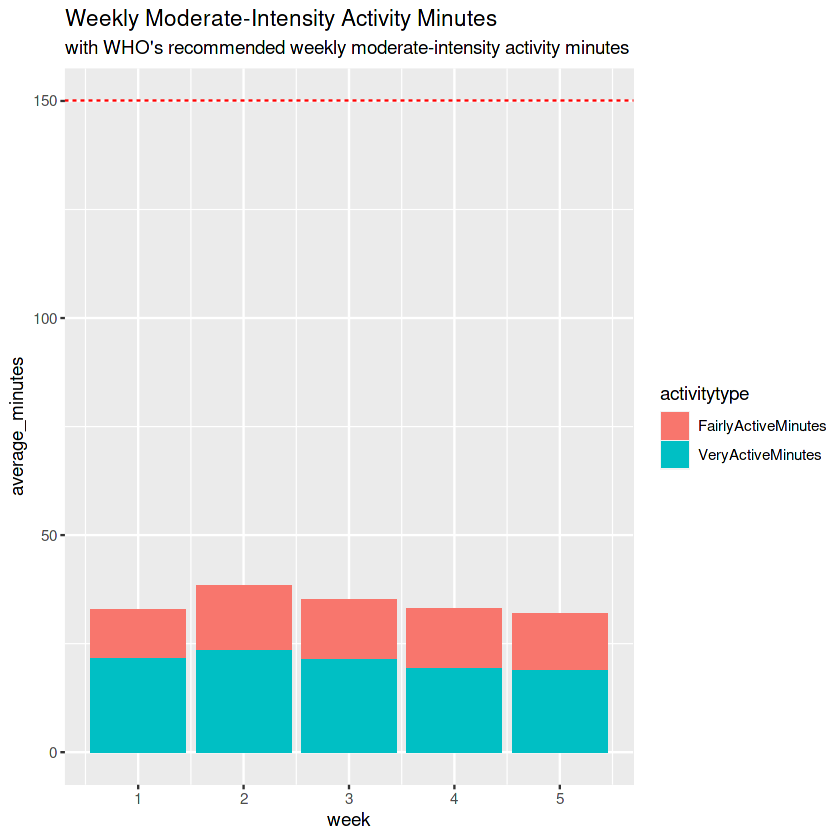

In [16]:
#plotting Activity type minus Lightly and Sendentary minutes to compare them to WHO and CDC recommended activity time
long_dailyintensity %>% 
  filter(activitytype != "SedentaryMinutes") %>%
  filter(activitytype != "LightlyActiveMinutes") %>% 
  group_by(week,activitytype) %>% 
  summarise(average_minutes = mean(minutes)) %>% 
  ggplot() +
  geom_col(mapping = aes( x = week, y = average_minutes, fill = activitytype))+
  geom_hline(yintercept = 150,linetype="dashed",color="red")+
    labs(title = "Weekly Moderate-Intensity Activity Minutes",
       subtitle = "with WHO's recommended weekly moderate-intensity activity minutes")

Plotting each user's Fairly Active Minutes and Very Active Minutes. Taking a closer look on individual level

In [17]:
weeklyactiveminutes <- dailyactivity %>% 
  select(Id,week,VeryActiveMinutes,FairlyActiveMinutes) %>% 
  group_by(Id,week) %>%
  summarise(totalveryactivemin = mean(VeryActiveMinutes),
            totalfairlyactivemin = mean(FairlyActiveMinutes)) %>% 
  arrange(week)
#creating summary table to use in plot in order to be able to plot 2 dataframe
sum_weeklyactiviteminutes <- weeklyactiveminutes %>%
  group_by(week,Id) %>% 
  summarise(total_vigorousmin = sum(totalveryactivemin),
            total_moderatemin = sum(totalfairlyactivemin))

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'week'. You can override using the `.groups` argument.



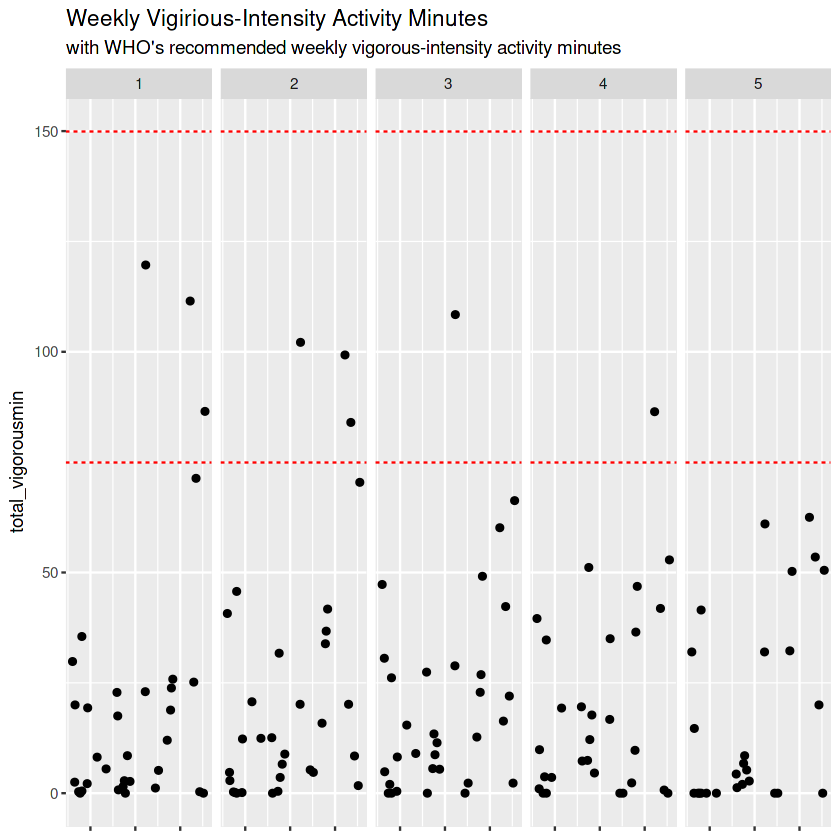

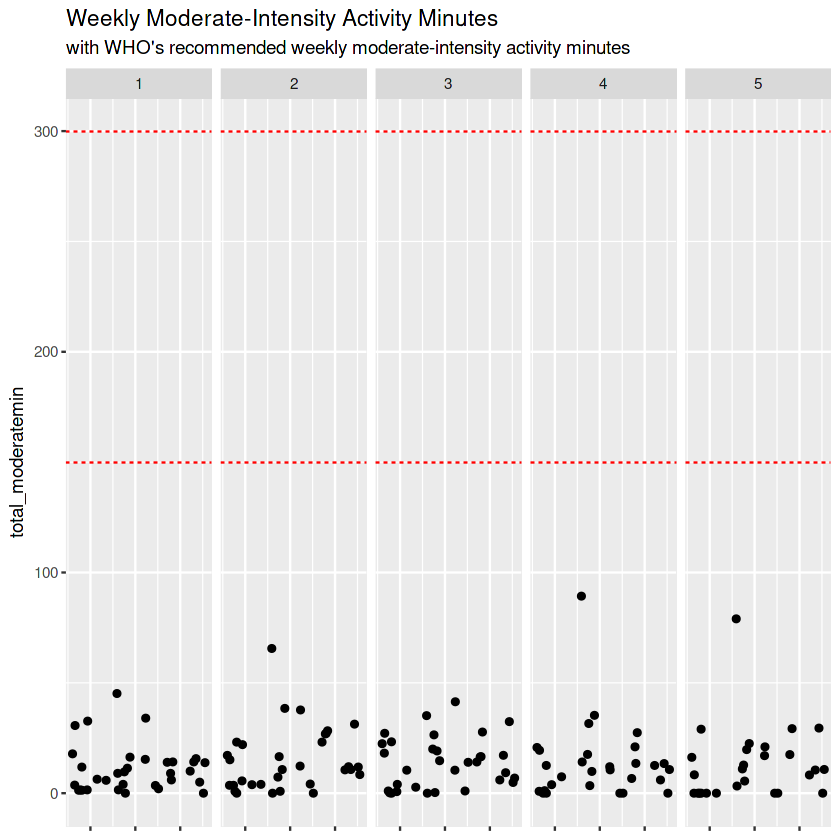

In [18]:
#Weekly Vigirious-Intensity Activity Minutes 
ggplot()+
  geom_point(data=sum_weeklyactiviteminutes,aes(x= Id, y=total_vigorousmin))+
  geom_hline(yintercept = 75,linetype="dashed",color="red")+
  geom_hline(yintercept = 150,linetype="dashed",color="red")+
  facet_grid(~week)+
  labs(title = "Weekly Vigirious-Intensity Activity Minutes",
       subtitle = "with WHO's recommended weekly vigorous-intensity activity minutes")+
  theme(axis.text.x = element_blank(),
        axis.title.x = element_blank())
#Weekly Moderate-Intensity Activity Minutes 
ggplot()+
  geom_point(data=sum_weeklyactiviteminutes, aes(x= Id, y=total_moderatemin))+
  geom_hline(yintercept = 150,linetype="dashed",color="red")+
  geom_hline(yintercept = 300,linetype="dashed",color="red")+
  facet_grid(~week)+
  labs(title = "Weekly Moderate-Intensity Activity Minutes",
       subtitle = "with WHO's recommended weekly moderate-intensity activity minutes")+
  theme(axis.text.x = element_blank(),
        axis.title.x = element_blank())

CDC recommended 10K steps per day for a healthy life

`summarise()` has grouped output by 'weekday'. You can override using the `.groups` argument.



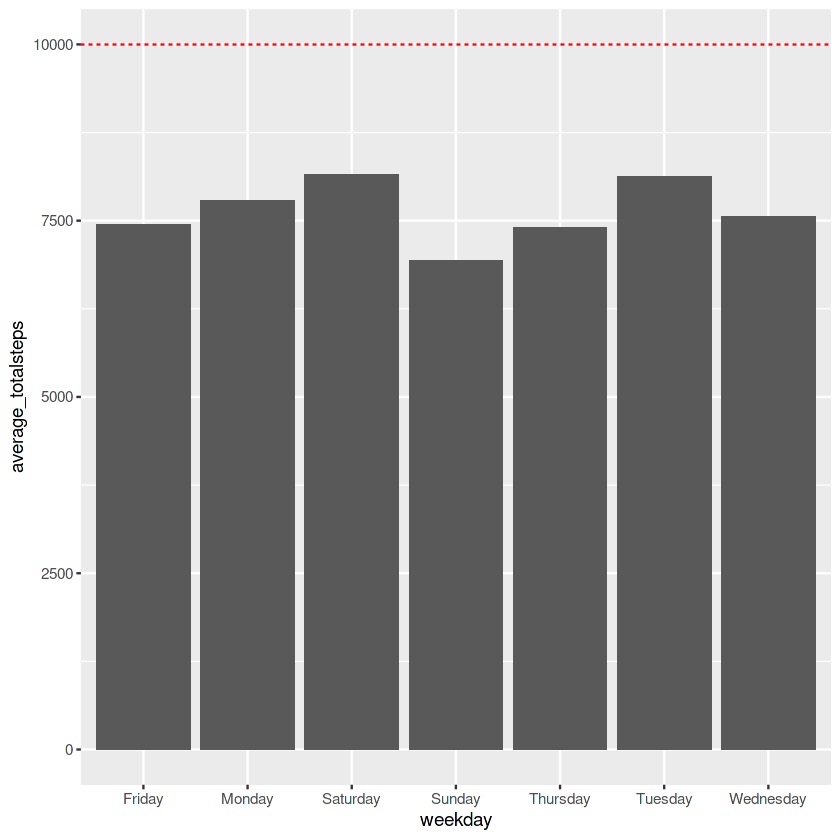

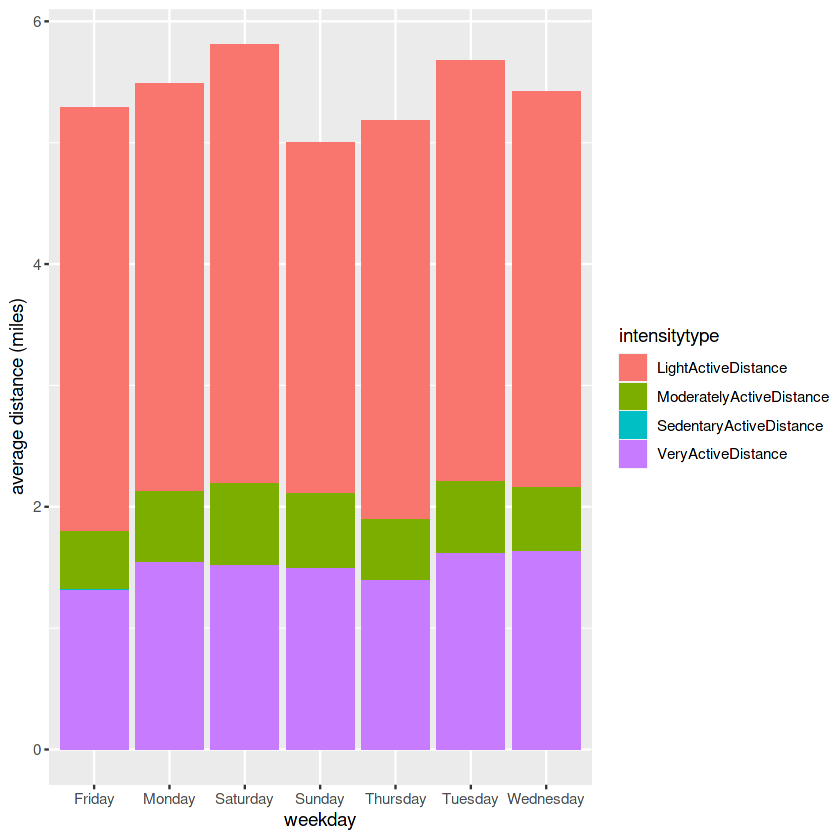

In [19]:
#plot average daily steps by weekdays
dailyactivity %>% 
group_by(weekday) %>% 
  summarise(average_totalsteps = mean(TotalSteps)) %>% 
  ggplot()+
  geom_col(mapping = aes(x = weekday, y = average_totalsteps))+
  geom_hline(yintercept = 10000,linetype="dashed",color="red")
#plot total distance with intensity level
dailyactivity %>% 
  select(weekday, VeryActiveDistance:SedentaryActiveDistance) %>% 
  gather(intensitytype, distance, -weekday) %>%
  group_by(weekday,intensitytype) %>% 
  summarise(avg_distance = mean(distance)) %>% 
  ggplot()+
  geom_col(mapping = aes(x = weekday, y = avg_distance, fill = intensitytype))+
  ylab("average distance (miles)")

# Conclusion

**Summary**

Based on the analyst on datas from the users who participated in sharing their FitBit data we can conclude that:
* Users are the most active in the morning between 7 AM to 11 AM, and evenings between 4 PM to 6 PM.
* User's activity type were mostly Sendentary or not active. Throughout the 5 week period, users did not meet WHO's and CDC's weekly recommended 150 minutes of moderate to vigorous active minutes for people ages 18-64.
* User also did not meet CDC's 10k steps per day recommendation.

What it means for BellaBeat App and its marketing strategy:
* Although users are using fitness tracking devices to track their daily health and activity, they still did not meet WHO and CDC's recommended minimum active minutes to maintain a healthy lifestyle. There is an opportunity for BellaBeat to address this gap. 

**Limitation**

* Limited demographic information from Fitbit User Data - Since BellaBeat is a female focus wellness company, I would suggest further research and analysis on female focus data. 
* Limited clarification for the Fitbit User Data - ie. Sleep only record TotalminutesAsleep and TotalminutesinBed. Would be nice to find out the sleep quality users are getting through REM.

**Further Study**
* A study on BellaBeat User would yield more useful information on how users use and interact with the BellaBeat products. The study would enable Bellabeat to understand BellaBeat consumer behaviour and help identify any gaps in their products and be helpful for future marketing strategy or development strategy.

Note
* https://en.wikipedia.org/wiki/Metabolic_equivalent_of_task#Activities
* [CDC rec](https://www.cdc.gov/physicalactivity/basics/age-chart.html)
* METs level to activity [link](https://www.timeofcare.com/wp-content/uploads/2017/04/METs-Metabolicequivalents.pdf) -Fitbit mets does not have decimal so 10 =1.0